<a href="https://colab.research.google.com/github/ihsraham/TensorFlow/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Create data to view and fit

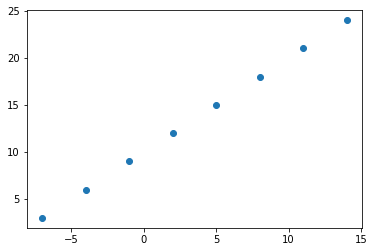

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
 # Create a demo tensor for our price prediction problem
 house_info = tf.constant(["bedroom", "bathroom", "garage"])
 house_price = tf.constant([93700])
 house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([93700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

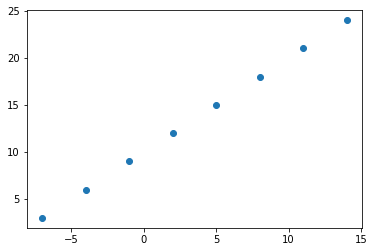

In [ ]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow



1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** -  define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels). 



In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 677ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving a model

We can improve our model, by altering the steps we took to crete a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation functionof each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fir the model (this time we'll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 264ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model's prediction has improved..
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's rebuild our model

# 1. Create a model (This time with an extra layer with 100 hidden units)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile our model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# #.Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 334ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - l

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

array([[31.223137]], dtype=float32)

In [ ]:
# Let's rebuild our model

# 1. Creating a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# 3. Fit the model 
model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 345ms/step - loss: 9.8244 - mae: 9.8244
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.8240 - mae: 9.8240
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8235 - mae: 9.8235
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8231 - mae: 9.8231
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8226 - mae: 9.8226
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8222 - mae: 9.8222
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8217 - mae: 9.8217
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8213 - mae: 9.8213
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 9.8208 - mae: 9.8208
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 9.8204 - mae: 9.8204
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 9.8

In [ ]:
# Let's see how much our model has improved
model.predict([17.0])

array([[18.032803]], dtype=float32)

In [ ]:
# Let's rebuild our model

# 1. Creating a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 350ms/step - loss: 13.5267 - mae: 13.5267
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.4372 - mae: 13.4372
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.3477 - mae: 13.3477
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 13.2581 - mae: 13.2581
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 13.1685 - mae: 13.1685
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 13.0788 - mae: 13.0788
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9891 - mae: 12.9891
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8994 - mae: 12.8994
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 12.8098 - mae: 12.8098
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7209 - mae: 12.7209
Epoch 11/100
1/1 [==============================] - 0s 7m

In [ ]:
# Let's see how much our model has improved
model.predict([17.0])

array([[25.852007]], dtype=float32)

In [ ]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer wih 100 hidden units)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 305ms/step - loss: 12.5326 - mae: 12.5326
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.8956 - mae: 11.8956
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2464 - mae: 11.2464
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5791 - mae: 10.5791
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 9.8874 - mae: 9.8874
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1649 - mae: 9.1649
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.4050 - mae: 8.4050
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.6117 - mae: 7.6117
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 6.7798 - mae: 6.7798
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 5.8888 - mae: 5.8888
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - los

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

array([[32.787727]], dtype=float32)

In [ ]:
# Let's see if we can make another change to improve our model

# 1. Creating a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


1/1 [==============================] - 0s 345ms/step - loss: 13.4588 - mae: 13.4588
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 12.8717 - mae: 12.8717
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.2913 - mae: 12.2913
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.7929 - mae: 11.7929
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4167 - mae: 11.4167
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 11.0371 - mae: 11.0371
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6558 - mae: 10.6558
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2756 - mae: 10.2756
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8942 - mae: 9.8942
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 9.5081 - mae: 9.5081
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss

In [ ]:
# Let's see how good our model is
model.predict([17.0])

array([[27.758755]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset 
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# MAke labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

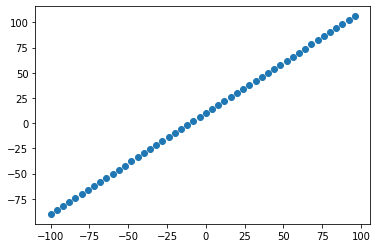

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y);

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15 of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into training and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualising the data

Now we've got our data in training and test sets... let's visualize it again!

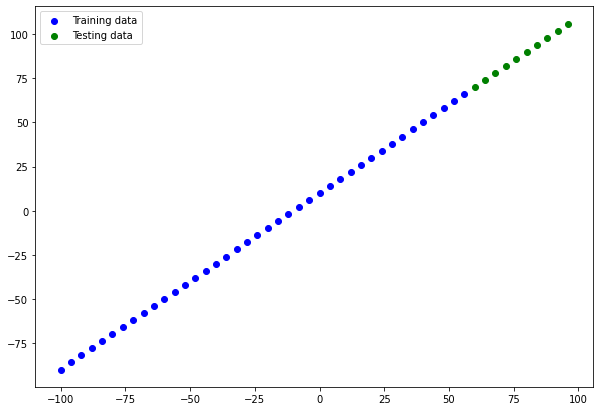

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue 
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# # 3. fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

model.summary()
---------------------------------------------------------------------------

ValueError                                Traceback (most recent call last)

<ipython-input-38-5f15418b3570> in <module>()
----> 1 model.summary()

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py in summary(self, line_length, positions, print_fn)
   2519     """
   2520     if not self.built:
-> 2521       raise ValueError('This model has not yet been built. '
   2522                        'Build the model first by calling `build()` or calling '
   2523                        '`fit()` with some data, or specify '

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential(name="model_1")
model.add(tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"))
model.add(tf.keras.layers.Dense(1, name="output_layer"))

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters are not updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

**Resource:** For a more in-depth overview of the trainable parameters  within a layer, check out MIT's Introduction to Deep Learning video.

**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that affects the number of parameters (total and trainable) by calling `model.summary()`.

In [ ]:
# Let's fit our model to the training data 
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Let's get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


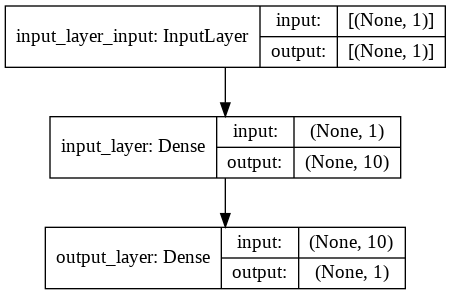

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` vs `y_pred` (ground truth versus your model's predictions).

In [ ]:
 # make some predictions
 y_pred = model.predict(X_test)
 y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show the legend
  plt.legend();


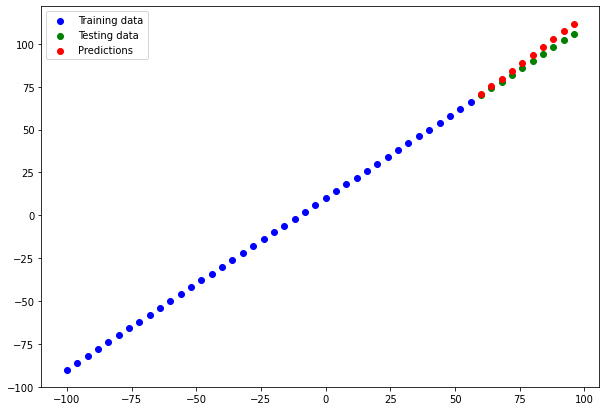

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 128ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate the mean absolute error
tf.cast(y_test, float)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [ ]:
y_pred.T - tf.cast(y_test, float)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.5521774, 1.1399078, 1.7276306, 2.3153534, 2.9030762, 3.4908066,
        4.0785294, 4.666252 , 5.253975 , 5.8416977]], dtype=float32)>

In [ ]:
abs(y_pred.T - tf.cast(y_test, float))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.5521774, 1.1399078, 1.7276306, 2.3153534, 2.9030762, 3.4908066,
        4.0785294, 4.666252 , 5.253975 , 5.8416977]], dtype=float32)>

In [ ]:
(abs(y_pred.T - tf.cast(y_test, float)))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.5521774, 1.1399078, 1.7276306, 2.3153534, 2.9030762, 3.4908066,
        4.0785294, 4.666252 , 5.253975 , 5.8416977]], dtype=float32)>

In [ ]:
len(y_pred)

10

In [ ]:
sum = 0
for val in (abs(y_pred.T - tf.cast(y_test, float))):
  for val1 in val:
    sum+=val1
print(sum)

tf.Tensor(31.969406, shape=(), dtype=float32)


In [ ]:
mae = sum/len(y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the men absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

Now our tensors `y_pred` and `y_test` are of same shape. We can compare them now.

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the mean squared error
sum = 0
for val in ((y_pred.T - tf.cast(y_test, float))**2):
  for val1 in val:
    sum+=val1
print(sum)
mse = sum/len(y_pred)
print(mse)

tf.Tensor(130.70143, shape=(), dtype=float32)
tf.Tensor(13.070143, shape=(), dtype=float32)


In [ ]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
huber = tf.keras.losses.huber(y_true=y_test,
                         y_pred=tf.squeeze(y_pred))
huber

<tf.Tensor: shape=(), dtype=float32, numpy=2.7069678>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```


1. Get more data - get more examples for your model to train on (opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in your data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**



In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

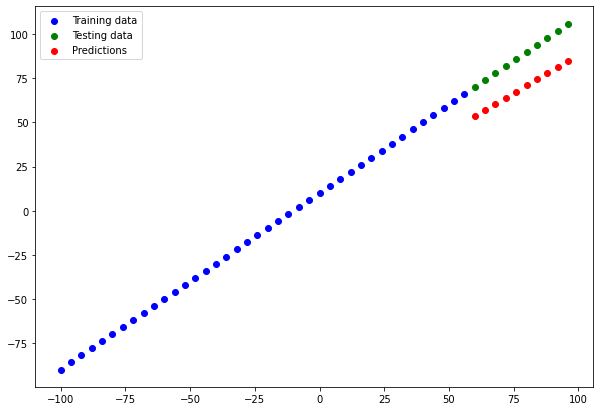

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
y_preds_1

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [ ]:
mse_1 = mse(y_test, y_preds_1)
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
#  Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(units=10))
model_2.add(tf.keras.layers.Dense(1)) 

# 2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [========================

In [ ]:
y_preds_2 = model_2.predict(X_test)
y_preds_2

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

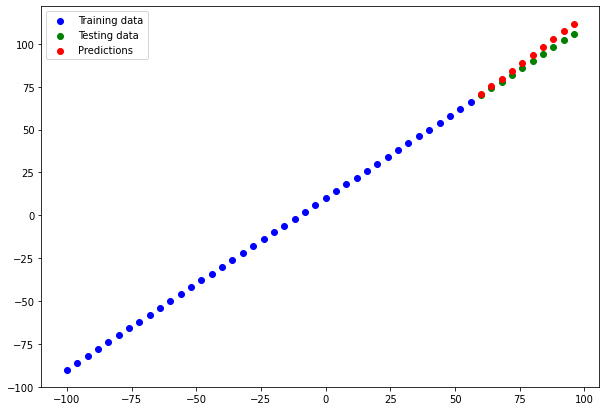

In [ ]:
plot_predictions(predictions=y_preds_2)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mse: 1334.8956
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/500
2/2 [=========================

In [ ]:
y_preds_3 = model_3.predict(X_test)
y_preds_3

array([[15.854742],
       [16.617329],
       [17.379915],
       [18.142504],
       [18.905092],
       [19.667677],
       [20.430264],
       [21.192854],
       [21.95544 ],
       [22.718027]], dtype=float32)

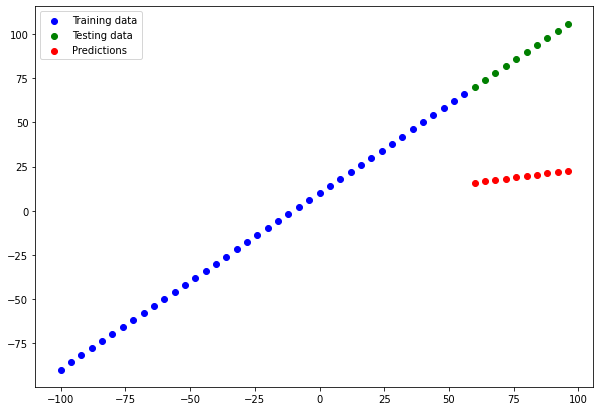

In [ ]:
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note:** One of the main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our models to:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab 
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google colab to Google drive (requires Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/1234

In [ ]:
!ls /content/drive/MyDrive/1234

"2021-05-09 15.47.07 Sangita Vishwakarma's Personal Meeting Room 7387491608.mp4"
'2021-06-23 17.06.43 TTT schedule - Dawn to Dusk 71976213255.mp4'
"2021-07-16 17.14.46 Sony Mishra's Zoom Meeting 81387526320.mp4"
"2021-07-16 17.39.50 Sony Mishra's Zoom Meeting 81387526320.mp4"
"2021-07-19 17.01.36 Sony Mishra's Zoom Meeting 86189689070.mp4"
 anvSyncDroid
 best_model_HDF5_format.h5
 BTP_Report.docx
 BTP_Report.gdoc
 Camera
 Camera.zip
 CamScanner
 Certificate-F-2019-E46D2A68261.pdf
'Copy of 6384720-ALANCE.part1.rar'
'Copy of 6384720-ALANCE.part2.rar'
'Copy of 6384720-ALANCE.part3.rar'
'Copy of OG0938-STE2BS.part1.rar'
'Copy of OG0977-PIETFN.rar'
'Copy of [Ttorial.Com] Beginner Mobile Photography.rar'
'Data Structures and Algorithms'
 IBP_presentation_Group5.pptx
 Lectures
'Manas documents'
'Microsoft Excel Certificates'
'NCERT Economics'
 OG0977-PIETFN.rar
 PhoneRecord
 Photos
 Photos.zip
'Resume 1.1.docx'
'Resume 1.5.pdf'
'Resume 1.5 uscreen.pdf'
'Resume 1.7.pdf'
'Resume 1.8.pdf'
'Resum

## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model 
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Right now it looks like our model isn't performing too well.. let's try to improve it!

In [ ]:
cb_reducelr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss',
    mode='min',
    factor=0.1,
    patience=10,
    verbose=1,
    min_lr=0.000001
)

In [ ]:
cb_earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='loss',
    mode='min',
    min_delta=0.001,
    patience=10,
    verbose=1
)


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
i_model_1 = tf.keras.Sequential()
i_model_1.add(tf.keras.layers.Dense(50, activation="tanh"))
i_model_1.add(tf.keras.layers.Dense(10, activation="relu"))
i_model_1.add(tf.keras.layers.Dense(10, activation="relu"))
i_model_1.add(tf.keras.layers.Dense(1, activation="relu"))

# 2. Compile the model
i_model_1.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["mae"])

# 3. Fit the model
I_model_fit = i_model_1.fit(X_train, 
                            y_train, 
                            epochs=1000, 
                            callbacks=[cb_reducelr, cb_earlystop])

Epoch 1/1000
34/34 [==============================] - 1s 2ms/step - loss: 13344.4561 - mae: 13344.4561
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 13339.9482 - mae: 13339.9482
Epoch 3/1000
34/34 [==============================] - 0s 3ms/step - loss: 13330.8193 - mae: 13330.8193
Epoch 4/1000
34/34 [==============================] - 0s 2ms/step - loss: 13317.1133 - mae: 13317.1133
Epoch 5/1000
34/34 [==============================] - 0s 3ms/step - loss: 13296.6328 - mae: 13296.6328
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 13266.9346 - mae: 13266.9346
Epoch 7/1000
34/34 [==============================] - 0s 4ms/step - loss: 13224.7520 - mae: 13224.7520
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 13166.6328 - mae: 13166.6328
Epoch 9/1000
34/34 [==============================] - 0s 4ms/step - loss: 13090.1416 - mae: 13090.1416
Epoch 10/1000
34/34 [==============================] - 0s 3ms/step - loss

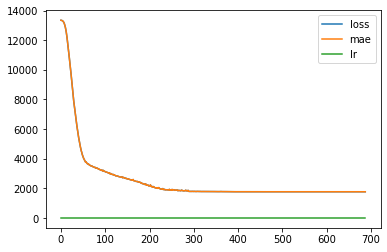

In [ ]:
pd.DataFrame(I_model_fit.history).plot()

In [ ]:
i_model_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1560.7059 - mae: 1560.7059


[1560.7059326171875, 1560.7059326171875]

Right now it look like our model isn't performing too well... let's try and improve it!
To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer.
2. Same as above but train for longer (200 epochs)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential()
insurance_model_2.add(tf.keras.layers.Dense(100))
insurance_model_2.add(tf.keras.layers.Dense(10))
insurance_model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
insurance_model_2.compile(loss="mae",
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as above)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss="mae",
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'epochs')

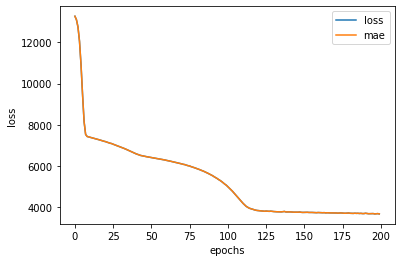

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


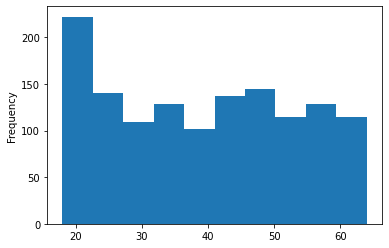

In [ ]:
X["age"].plot(kind="hist")

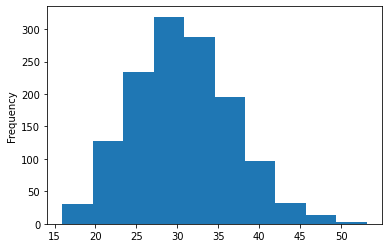

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),  # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create our X & y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncode
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.loc[0] 

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential(
    [tf.keras.layers.Dense(100),
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)]
)

# 2. Compile the model
insurance_model_4.compile(loss="mae",
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11925.96

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
i_model_1 = tf.keras.Sequential()
i_model_1.add(tf.keras.layers.Dense(50, activation="tanh"))
i_model_1.add(tf.keras.layers.Dense(10, activation="relu"))
i_model_1.add(tf.keras.layers.Dense(10, activation="relu"))
i_model_1.add(tf.keras.layers.Dense(1, activation="relu"))

# 2. Compile the model
i_model_1.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["mae"])

# 3. Fit the model
I_model_fit = i_model_1.fit(X_train_normal, 
                            y_train, 
                            epochs=1000, 
                            callbacks=[cb_reducelr, cb_earlystop])

Epoch 1/1000
34/34 [==============================] - 1s 2ms/step - loss: 13345.6611 - mae: 13345.6611
Epoch 2/1000
34/34 [==============================] - 0s 2ms/step - loss: 13343.0762 - mae: 13343.0762
Epoch 3/1000
34/34 [==============================] - 0s 2ms/step - loss: 13335.3584 - mae: 13335.3584
Epoch 4/1000
34/34 [==============================] - 0s 3ms/step - loss: 13317.0195 - mae: 13317.0195
Epoch 5/1000
34/34 [==============================] - 0s 2ms/step - loss: 13281.7500 - mae: 13281.7500
Epoch 6/1000
34/34 [==============================] - 0s 3ms/step - loss: 13224.3691 - mae: 13224.3691
Epoch 7/1000
34/34 [==============================] - 0s 2ms/step - loss: 13141.7803 - mae: 13141.7803
Epoch 8/1000
34/34 [==============================] - 0s 2ms/step - loss: 13031.5576 - mae: 13031.5576
Epoch 9/1000
34/34 [==============================] - 0s 2ms/step - loss: 12891.2002 - mae: 12891.2002
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss

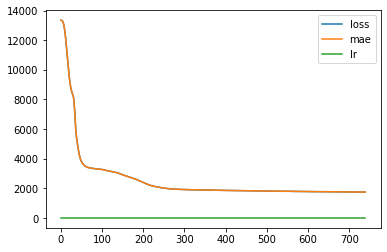

In [ ]:
pd.DataFrame(I_model_fit.history).plot()

In [ ]:
i_model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1613.5618 - mae: 1613.5618


[1613.561767578125, 1613.561767578125]